# Stage 2 Model Selection

This notebook generates the summary result tables and charts 

* Figure 3: Cross-validation variation in MASE across regions by horizon


In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set()

import numpy as np

#plt.style.use('ggplot')

In [2]:
os.getcwd()

'/home/tom/Dropbox/Python/ambo-forecasting/results/regions'

In [5]:
mypath = '.'
result_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [6]:
results_mean = pd.DataFrame()
results_med = pd.DataFrame()
results_mean_std = pd.DataFrame()

## Point Estimate Results

In [7]:
error_measures = ['smape', 'rmse', 'mase', 'coverage_80', 'coverage_95']

In [8]:
for metric in error_measures:
    to_read = [filename for filename in result_files if metric in filename]
    model_names = [name[:name.index('_')] for name in to_read]
    
    for filename, model_name in zip(to_read, model_names):
        df = pd.read_csv(filename, index_col=0)

        prefix = model_name + '_' + metric
        results_mean[prefix + '_mean'] = df.mean()
        results_mean[prefix  + '_std'] = df.std()
        results_med[prefix + '_med'] = df.median()
        results_med[prefix + '_iqr'] = df.quantile(0.75) - df.quantile(0.25)
        
        results_mean_std[prefix] = results_mean[prefix + '_mean'].map('{:,.2f}'.format) \
            + ' (' + results_mean[prefix  + '_std'].map('{:,.2f}'.format) + ')'

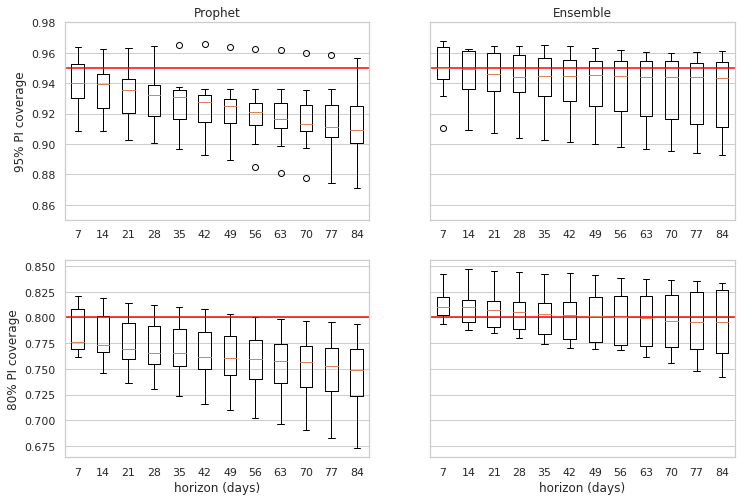

In [19]:
#Variability of PI Coverage across regions in the South West of England

fig, ax = plt.subplots(2, 2, figsize=(12,8), sharey='row')
#fig.set_size_inches(w=5, h=4) 

days = [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]

summary_fbp = results_mean.filter(like="coverage_95").filter(like="fbp_").filter(like='mean')
ax[0][0].boxplot(x=summary_fbp, labels=days);
ax[0][0].axhline(y=0.95, color='red')
ax[0][0].set_ylabel('95% PI coverage')
#ax[0][0].set_xlabel('horizon (days)')
ax[0][0].set_ylim(0.85, 0.98)
ax[0][0].set_title('Prophet')
ax[0][0].xaxis.grid(False)
#ax[0][0].legend(['Prophet'], markerscale=2.0)
#ax[0][0].annotate(s='Prophet', xy=(7, 0.96), xytext=(10, 0.975))

summary_fa = results_mean.filter(like="coverage_95").filter(like="fbp-").filter(like='mean')
ax[0][1].boxplot(x=summary_fa , labels=days);
ax[0][1].axhline(y=0.95, color='red')
ax[0][1].xaxis.grid(False)
ax[0][1].set_title('Ensemble')
#ax[0][1].set_xlabel('horizon (days)')
#ax[0][1].legend(['Ensemble'])

summary_fbp2 = results_mean.filter(like="coverage_80").filter(like="fbp_").filter(like='mean')
ax[1][0].boxplot(x=summary_fbp2, labels=days);
ax[1][0].axhline(y=0.80, color='red')
ax[1][0].xaxis.grid(False)
ax[1][0].set_ylabel('80% PI coverage')
ax[1][0].set_xlabel('horizon (days)')
#ax[1][0].legend(['Prophet'])

summary_fa2 = results_mean.filter(like="coverage_80").filter(like="fbp-").filter(like='mean')
ax[1][1].boxplot(x=summary_fa2, labels=days);
ax[1][1].axhline(y=0.80, color='red')
ax[1][1].xaxis.grid(False)
ax[1][1].set_xlabel('horizon (days)')
#ax[1][1].legend(['Ensemble'])

fig.savefig('cv_coverage_region.png', dpi=300, bbox_inches='tight')

Text(0.5, 0, 'horizon (days)')

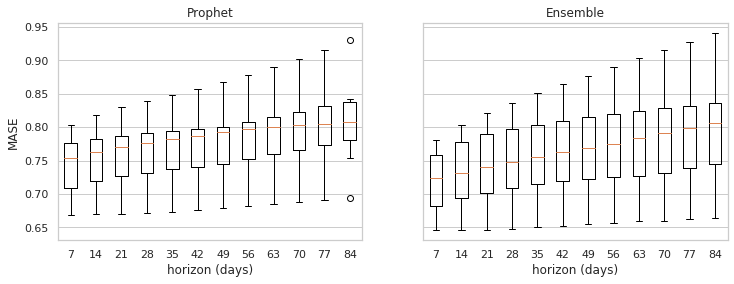

In [10]:
#Variability of MASE across regions in the South West of England

fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey='row')

days = [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]

summary_fbp = results_mean.filter(like="mase").filter(like="fbp_").filter(like='mean')
ax[0].boxplot(x=summary_fbp, labels=days);
#ax[0][0].axhline(y=0.95, color='red')
ax[0].set_ylabel('MASE')
ax[0].set_xlabel('horizon (days)')
#ax[0].set_ylim(0.91, 0.98)
ax[0].set_title('Prophet')
ax[0].xaxis.grid(False)
#ax[0][0].legend(['Prophet'], markerscale=2.0)
#ax[0][0].annotate(s='Prophet', xy=(7, 0.96), xytext=(10, 0.975))

summary_fa = results_mean.filter(like="mase").filter(like="fbp-").filter(like='mean')
ax[1].boxplot(x=summary_fa , labels=days);
#ax[1].axhline(y=0.95, color='red')
ax[1].xaxis.grid(False)
ax[1].set_title('Ensemble')
ax[1].set_xlabel('horizon (days)')
#ax[0][1].legend(['Ensemble'])


#fig.savefig('mase_cv_by_region.png', dpi=300, bbox_inches='tight')

In [11]:
region_means = results_mean.filter(like="mase").filter(like='mean').mean().sort_index()

In [12]:
region_std = results_mean.filter(like="mase").filter(like='std').mean().sort_index()

In [13]:
region_95_mean = results_mean.filter(like="coverage_95").filter(like='mean').mean().sort_index()
region_80_mean = results_mean.filter(like="coverage_80").filter(like='mean').mean().sort_index()

In [14]:
region_95_std = results_mean.filter(like="coverage_95").filter(like='std').mean().sort_index()
region_80_std = results_mean.filter(like="coverage_80").filter(like='std').mean().sort_index()

In [15]:
comparisons = list(region_means.index)
idx = [i.replace('_mase_mean', '') for i in comparisons]

In [16]:
df_regions = pd.DataFrame(region_means.to_numpy(), columns=['mean'])
df_regions['std'] = region_std.to_numpy()
df_regions['mean_80'] = region_80_mean.to_numpy()
df_regions['std_80'] = region_80_std.to_numpy()
df_regions['mean_95'] = region_95_mean.to_numpy()
df_regions['std_95'] = region_95_std.to_numpy()
df_regions['MASE'] = df_regions['mean'].map('{:,.2f}'.format) \
            + ' (' + df_regions['std'].map('{:,.2f}'.format) + ')'

df_regions['Coverage 80'] = df_regions['mean_80'].map('{:,.2f}'.format) \
            + ' (' + df_regions['std_80'].map('{:,.2f}'.format) + ')'

df_regions['Coverage 95'] = df_regions['mean_95'].map('{:,.2f}'.format) \
            + ' (' + df_regions['std_95'].map('{:,.2f}'.format) + ')'

df_regions.index = idx
df_regions = df_regions.drop(['mean', 'std', 'mean_80', 'std_80', 
                              'mean_95', 'std_95'], axis=1)
df_regions




,MASE,Coverage 80,Coverage 95
BNSSG-fbp-arima,0.78 (0.14),0.82 (0.08),0.95 (0.04)
BNSSG-fbp,0.79 (0.14),0.76 (0.10),0.92 (0.05)
Cornwall-fbp-arima,0.65 (0.13),0.84 (0.08),0.96 (0.04)
Cornwall-fbp,0.68 (0.11),0.81 (0.07),0.96 (0.04)
Devon-fbp-arima,0.70 (0.12),0.82 (0.08),0.96 (0.04)
Devon-fbp,0.74 (0.13),0.78 (0.10),0.93 (0.05)
Dorset-fbp-arima,0.72 (0.13),0.82 (0.09),0.96 (0.04)
Dorset-fbp,0.74 (0.14),0.80 (0.09),0.94 (0.05)
Gloucestershire-fbp-arima,0.80 (0.21),0.78 (0.10),0.94 (0.06)
Gloucestershire-fbp,0.79 (0.21),0.77 (0.11),0.93 (0.07)


In [17]:
from scipy.stats import norm, t
import numpy as np

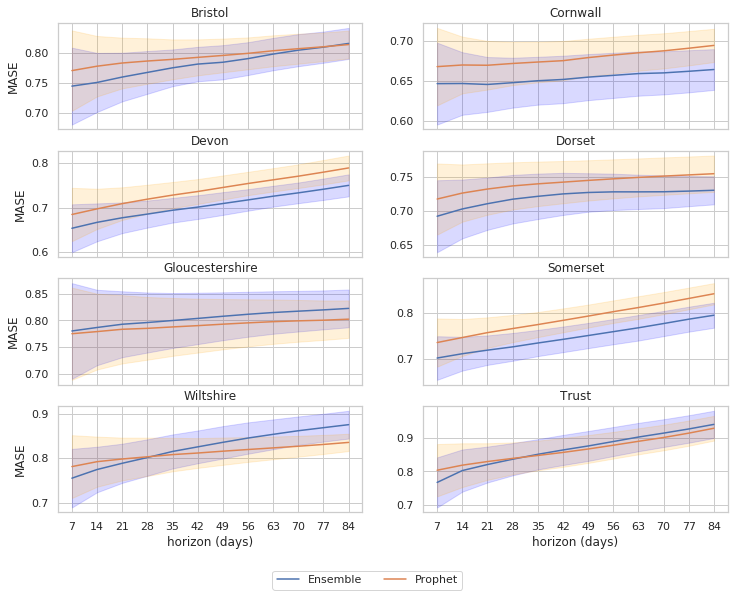

In [18]:
alpha = 0.05
n = 67

fig, ax = plt.subplots(4, 2, sharex=True, figsize=(12,9))

regions = ['BNSSG', 'Cornwall', 'Devon', 'Dorset', 'Gloucestershire', 'Somerset', 'Wiltshire', 'Trust']

index = 0
for row in range(4):
    for col in range(2):
        region = regions[index]
        means = results_mean.filter(like="mase").filter(like='mean').filter(like=region)
       
        #get a consistent ordering of series (columns)
        columns = means.columns
        columns = [s.replace('_mean', '') for s in columns]
        means.columns = columns
        means = means[sorted(list(means.columns))]
        
        #plot mean by horizon
        ax[row][col].plot(means)
        
        
        #calculate upper and lower CI half width
        hw = results_mean.filter(like="mase").filter(like='std').filter(like=region)
        hw = hw[sorted(list(hw.columns))]
        hw = hw / np.sqrt(n)
        z = np.abs(t.ppf(alpha / 2, n - 1))
        
        hw *= z
        means = results_mean.filter(like="mase").filter(like='mean').filter(like=region)
        means = means[sorted(list(means.columns))]
        
        columns = hw.columns
        columns = [s.replace('_std', '') for s in columns]
        hw.columns = sorted(columns)
        means.columns = columns
        
        upper = means + hw
        lower = means - hw
        
        #col 1 = ensemble
        col1 = upper.columns[0]
        
        #col 2 = prophet
        col2 = upper.columns[1]
        
        ax[row][col].fill_between(np.arange(12), lower[col1], upper[col1], color='blue', alpha=0.15)
        
         
        ax[row][col].fill_between(np.arange(12), lower[col2], upper[col2], color='orange', alpha=0.15)
        #ax[row][col].fill_between(np.arange(12), means[col2], lower[col2], color='orange', alpha=0.2)
       
        
        ax[row][col].set_title(region)
        #ax[row][col].legend(loc='best', labels=means.columns)
        index += 1
        
ax[3][0].set_xlabel('horizon (days)')
ax[3][1].set_xlabel('horizon (days)')

ax[0][0].set_ylabel('MASE')
ax[1][0].set_ylabel('MASE')
ax[2][0].set_ylabel('MASE')
ax[3][0].set_ylabel('MASE')
ax[0][0].set_title('Bristol')

fig.legend(['Ensemble', 'Prophet'], loc='lower center',ncol=2)

fig.savefig('cv_region_m_a_s_e.png', dpi=300, bbox_inches='tight')